In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf

In [2]:
filename = 'early_draft_notoo_v3.5_10yrs.db'
run_name = filename.replace(".db", "")

out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)

In [7]:
bundle_list = []

slicer = maf.HealpixSlicer(nside=64)
rolling_metric = maf.AccumulateCountMetric(bins=range(0, 3622+365, 365))
rolling_sqls = "scheduler_note not like '%DD%' and visitExposureTime > 20"
bundle = maf.MetricBundle(
    rolling_metric,
    slicer,
    rolling_sqls,
)
bundle_list.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [8]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir=out_dir, results_db=results_db)
bg.run_all()
#bg.plot_all(closefigs=False)

TypeError: bad number of pixels

<Figure size 640x480 with 0 Axes>

In [9]:
bundle_list[0].metric_values.shape

(49152, 10)

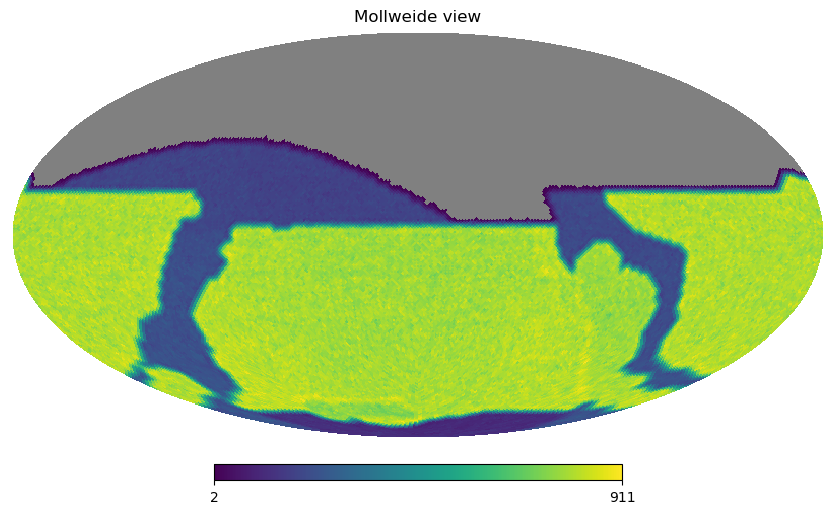

In [22]:
hp.mollview(bundle_list[0].metric_values[:,9])

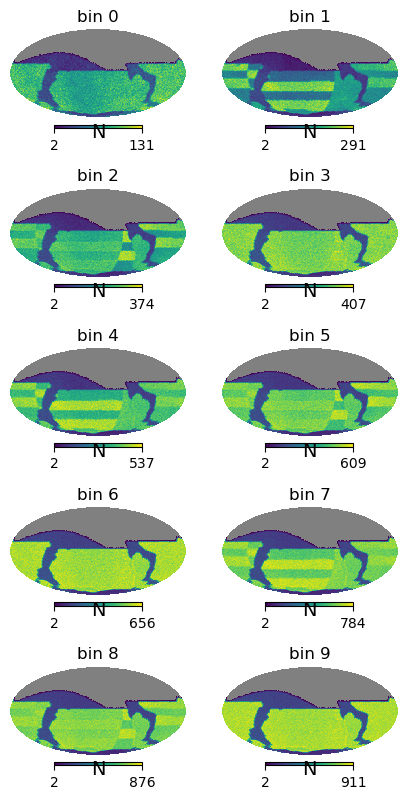

In [47]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(5,10))

for j in range(5):
    for i in range(2):
    
        plt.sca(axes[j,i])
        index = j*2+i
        hp.mollview(bundle_list[0].metric_values[:,index], hold=True, title='bin %i' % index, unit="N")
        
    #plt.sca(axes[0,1])
    #hp.mollview(bundle_list[0].metric_values[:,1], hold=True, title='bin 1')
    
    #plt.sca(axes[1,0])
    #hp.mollview(bundle_list[0].metric_values[:,2], hold=True, title='bin 2')



In [30]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

array([<Axes: >, <Axes: >], dtype=object)